In [62]:
import pandas as pd
import os
import pandas as pd
import requests
import sys
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error
from math import sqrt
# import dates as date

begindate = '20190917' # data is avail. beginning 20180917
enddate = '20190927'

comid_stn = pd.read_csv('D:/Sujana/Project/csv/comid_stationname.csv')
comid_all = comid_stn['COMID']
index = comid_stn['Index']
gauge_name_all = comid_stn['station']
rmse_df=pd.DataFrame()
# for i in index:
#     comid = comid_all[i]
#     gauge_name = gauge_name_all[i]
# # comid = 1479611
# # gauge_name = 'JAIT2'
#     nwm_discharge = pd.read_csv('D:/Sujana/Project/all_in_one/NWM_discharge_with_stage/short_range/'+str(comid)+'_with_stage.csv')
#     dd6_data = pd.read_csv('D:/Sujana/Project/all_in_one/DD6_stage_with_discharge/'+gauge_name+' with_discharge.csv')
#     nwm_discharge['Time']=pd.to_datetime(nwm_discharge['Time'],utc=True)
#     dd6_data['timestamp']=pd.to_datetime(dd6_data['timestamp'],utc=True)
#     # nwm_discharge = nwm_discharge.set_index('Time') 
#     dd6_data = dd6_data.set_index('timestamp')
#     nwm_discharge = nwm_discharge.set_index('Time') 





In [63]:
def get_location(ref_data,req_data):
    # Inputs:
    # ref_data: "dataframe" from which we need to extact the matching index
    # req_data: "datetime" for which the index close to ref_data's datetime is required
    # Output
    # Int if unique, and slice if monotonic
    index = ref_data.index.get_loc(req_data,method='nearest')
    return index

In [65]:
for i in index:
    comid = comid_all[i]
    gauge_name = gauge_name_all[i]
    nwm_discharge = pd.read_csv('D:/Sujana/Project/all_in_one/NWM_discharge_with_stage/short_range/'+str(comid)+'_with_stage.csv')
    dd6_data = pd.read_csv('D:/Sujana/Project/all_in_one/DD6_stage_with_discharge/'+gauge_name+' with_discharge.csv')
    nwm_discharge['Time']=pd.to_datetime(nwm_discharge['Time'],utc=True)
    dd6_data['timestamp']=pd.to_datetime(dd6_data['timestamp'],utc=True)
    # nwm_discharge = nwm_discharge.set_index('Time') 
    dd6_data = dd6_data.set_index('timestamp')
    nwm_discharge = nwm_discharge.set_index('Time') 

    # getting the list of indexes in nwm data that is closet to each dd6_data
    indx_list = [get_location(nwm_discharge,x) for x in dd6_data.index]
#   assigning the filtered indexes to the nwm_discharge
    nwm_discharge_filtered = nwm_discharge.iloc[indx_list]

# Creating new dataframe for error calculation
    new_df = pd.DataFrame()
    new_df['Date'] = dd6_data.index
    column1 = dd6_data.reset_index()['dd6_stage_m']
    column2 = nwm_discharge_filtered.reset_index()['interp_nwm_stage']
    new_df['Observed - Model'] = (column1-column2)
    new_df.set_index('Date')

  #     Calculating the root mean squared error  
    rmse_df['comid'] = rmse_df(comid)
    rmse_df['gauge name'] = gauge_name
    rmse_df['rmse'] = sqrt(mean_squared_error(column1, column2))
#     rmse.append(rms)


    



    # Plotting the error

    plt.figure(facecolor='white')
    plt.rc('font', size=14)
    fig, ax = plt.subplots(figsize=(10, 6))
    # time = discharge_difference['Time']
            # print (time)
    ax.plot(new_df['Date'], new_df['Observed - Model'],color='tab:blue', label='Observed-Model')
    
    ax.set(xlabel='Date',
            ylabel='Error [meters]',
            title=f'COMID {comid} {gauge_name} from ' \
            f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
            f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for short range')
    date_form = DateFormatter("%b %d")
    ax.xaxis.set_major_formatter(date_form)
    # ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    # ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
    ax.legend()
    ax.grid(True)
    plt.savefig('D:/Sujana/Project/all_in_one/error/plot/'+str (comid)+' Station '+gauge_name+'_Stage_graph_shortrange.jpg')

TypeError: cannot concatenate object of type '<class 'numpy.int64'>'; only Series and DataFrame objs are valid

In [45]:
def get_location(ref_data,req_data):
    # Inputs:
    # ref_data: "dataframe" from which we need to extact the matching index
    # req_data: "datetime" for which the index close to ref_data's datetime is required
    # Output
    # Int if unique, and slice if monotonic
    index = ref_data.index.get_loc(req_data,method='nearest')
    return index

In [46]:
# getting the list of indexes in nwm data that is closet to each dd6_data
indx_list = [get_location(nwm_discharge,x) for x in dd6_data.index]
# assigning the filtered indexes to the nwm_discharge
nwm_discharge_filtered = nwm_discharge.iloc[indx_list]

In [47]:
# difference dataframe
new_df = pd.DataFrame()
new_df['Date'] = dd6_data.index
column1 = dd6_data.reset_index()['dd6_stage_m']
column2 = nwm_discharge_filtered.reset_index()['interp_nwm_stage']
new_df['Observed - Model'] = column1-column2
new_df
new_df.set_index('Date')

,Observed - Model
Date,
2019-09-17 00:23:42+00:00,0.606666
2019-09-17 08:53:43+00:00,0.637657
2019-09-17 09:08:44+00:00,0.622417
2019-09-17 09:23:43+00:00,0.652897
2019-09-17 12:38:44+00:00,0.671487
...,...
2019-09-26 21:09:23+00:00,3.235406
2019-09-26 21:24:23+00:00,3.204926
2019-09-26 21:39:23+00:00,3.239501


<Figure size 432x288 with 0 Axes>

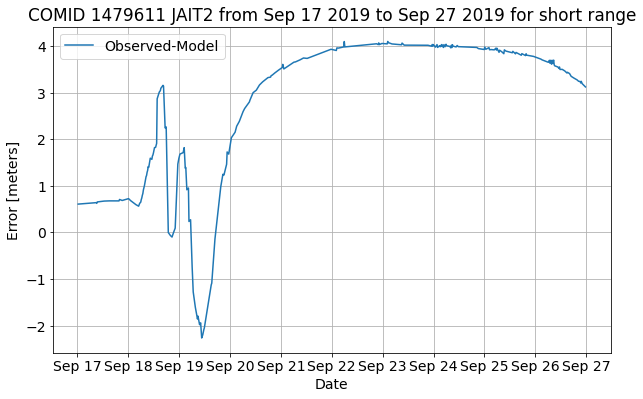

In [48]:
# Plotting error-time series
plt.figure(facecolor='white')
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(10, 6))
  # time = discharge_difference['Time']
          # print (time)
ax.plot(new_df['Date'], new_df['Observed - Model'],color='tab:blue', label='Observed-Model')
  
ax.set(xlabel='Date',
        ylabel='Error [meters]',
        title=f'COMID {comid} {gauge_name} from ' \
        f'{pd.to_datetime(begindate).strftime("%b %d %Y")} to ' \
        f'{pd.to_datetime(enddate).strftime("%b %d %Y")} for short range')
date_form = DateFormatter("%b %d")
ax.xaxis.set_major_formatter(date_form)
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator())
  # ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1, interval=1, tz=None)
ax.legend()
ax.grid(True)
plt.savefig('D:/Sujana/Project/all_in_one/error/plot/'+str (comid)+' Station '+gauge_name+'_Stage_graph_AnalysisAssim.jpg')

In [25]:
from sklearn.metrics import mean_squared_error
mean = mean_squared_error(column1,column2)

In [14]:
new_df['nwm_time'] = pd.to_datetime(nwm_discharge_filtered.index)

new_df['time_difference']=new_df['Date']-new_df['nwm_time']


In [27]:
new_df['nwm_time'] = nwm_discharge_filtered.index
new_df['nwm_time'] = new_df['nwm_time']


# type(new_df['nwm_time'])

In [28]:
date_1 = new_df['nwm_time']

In [29]:
from datetime import datetime
date_1 = new_df['nwm_time']
date_2 = new_df['Date']
date_format_str = '%d/%m/%Y %H:%M:%S.%f'
end =   datetime.strptime(date_2, date_format_str)
start = datetime.strptime(date_1, date_format_str)

# Get interval between two timstamps as timedelta object
diff = end - start
# Get interval between two timstamps in hours
diff_in_hours = diff.total_seconds() / 3600
print('Difference between two datetimes in hours:')
print(diff_in_hours)

TypeError: strptime() argument 1 must be str, not Series

In [ ]:
new_df['date_dd6']=dd6_data.index

In [23]:
dd6_data.reset_index()['dd6_stage_m']
dd6_data.index
dd6_data.iloc[:,:]
dd6_data.head(10)
nwm_discharge_filtered.head(10)

,Unnamed: 0,Discharge_NWM,interp_nwm_stage,nwm_stage_ft,
Time,,,,,
2019-09-17 00:00:00+00:00,0,0.26,0.252870,0.829627,NaN
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948,NaN
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948,NaN
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948,NaN
2019-09-17 13:00:00+00:00,13,0.78,0.279489,0.916958,NaN
2019-09-17 15:00:00+00:00,15,1.29,0.305595,1.002609,NaN
2019-09-17 20:00:00+00:00,20,2.43,0.363951,1.194064,NaN
2019-09-17 20:00:00+00:00,20,2.43,0.363951,1.194064,NaN
2019-09-17 21:00:00+00:00,21,2.55,0.370093,1.214217,NaN


In [16]:
dd6_data[['dd6_stage_m']]

,dd6_stage_m
timestamp,
2019-09-17 00:23:42+00:00,0.859536
2019-09-17 08:53:43+00:00,0.890016
2019-09-17 09:08:44+00:00,0.874776
2019-09-17 09:23:43+00:00,0.905256
2019-09-17 12:38:44+00:00,0.950976
...,...
2019-09-26 21:09:23+00:00,3.843528
2019-09-26 21:24:23+00:00,3.813048
2019-09-26 21:39:23+00:00,3.843528


In [5]:
dd6_data.head(10)

,value,quality,dd6_stage_m,interp_dd6_discharge
timestamp,,,,
2019-09-17 00:23:42+00:00,2.82,NaN,0.859536,16.302451
2019-09-17 08:53:43+00:00,2.92,NaN,0.890016,17.408985
2019-09-17 09:08:44+00:00,2.87,NaN,0.874776,16.855718
2019-09-17 09:23:43+00:00,2.97,NaN,0.905256,17.962253
2019-09-17 12:38:44+00:00,3.12,NaN,0.950976,20.769091
2019-09-17 15:08:45+00:00,3.22,NaN,0.981456,22.831491
2019-09-17 19:38:45+00:00,3.41,NaN,1.039368,26.750050
2019-09-17 19:53:45+00:00,3.51,NaN,1.069848,28.812449
2019-09-17 21:08:46+00:00,3.46,NaN,1.054608,27.781249


In [15]:
num_discharge_filtered.head(10)

,Unnamed: 0,Discharge_NWM,interp_nwm_stage,nwm_stage_ft
Time,,,,
2019-09-17 00:00:00+00:00,0,0.26,0.252870,0.829627
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948
2019-09-17 13:00:00+00:00,13,0.78,0.279489,0.916958
2019-09-17 15:00:00+00:00,15,1.29,0.305595,1.002609
2019-09-17 20:00:00+00:00,20,2.43,0.363951,1.194064
2019-09-17 20:00:00+00:00,20,2.43,0.363951,1.194064
2019-09-17 21:00:00+00:00,21,2.55,0.370093,1.214217


In [8]:
# getting the list of indexes in nwm data that is closet to each dd6_data
indx_list = [get_location(nwm_discharge,x) for x in dd6_data.index]
# assigning the filtered indexes to the nwm_discharge
num_discharge_filtered = nwm_discharge.iloc[indx_list]
num_discharge_filtered.to_csv(r'D:/Sujana/Project/all_in_one/error/'+str(comid)+'_'+gauge_name+'.csv')
num_discharge_combined = pd.read_csv('D:/Sujana/Project/all_in_one/error/'+str(comid)+'_'+gauge_name+'.csv')
num_discharge_combined['dd6_stage_m']=dd6_data['dd6_stage_m']
num_discharge_combined['interp_dd6_discharge'] = dd6_data['interp_dd6_discharge']


In [84]:
b['new'] = dd6_data['value']
b.head(10)




C:\Software\Anaconda\Temp/ipykernel_14008/407689311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['new'] = dd6_data['value']


,Unnamed: 0,Discharge_NWM,interp_nwm_stage,nwm_stage_ft,new
Time,,,,,
2019-09-17 00:00:00+00:00,0,0.26,0.252870,0.829627,NaN
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948,NaN
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948,NaN
2019-09-17 09:00:00+00:00,9,0.25,0.252358,0.827948,NaN
2019-09-17 13:00:00+00:00,13,0.78,0.279489,0.916958,NaN
2019-09-17 15:00:00+00:00,15,1.29,0.305595,1.002609,NaN
2019-09-17 20:00:00+00:00,20,2.43,0.363951,1.194064,NaN
2019-09-17 20:00:00+00:00,20,2.43,0.363951,1.194064,NaN
2019-09-17 21:00:00+00:00,21,2.55,0.370093,1.214217,NaN


#### Rough 

In [59]:
c = get_location(nwm_discharge,dd6_data.index[10])
print(c)
print(nwm_discharge.iloc[c])

24
Unnamed: 0       24.00
Discharge_NWM     3.27
Name: 2019-09-18 00:00:00+00:00, dtype: float64


In [32]:
# nwm_discharge['Time'].head()
dd6_data.index

DatetimeIndex(['2019-09-17 00:23:42+00:00', '2019-09-17 08:53:43+00:00',
               '2019-09-17 09:08:44+00:00', '2019-09-17 09:23:43+00:00',
               '2019-09-17 12:38:44+00:00', '2019-09-17 15:08:45+00:00',
               '2019-09-17 19:38:45+00:00', '2019-09-17 19:53:45+00:00',
               '2019-09-17 21:08:46+00:00', '2019-09-17 23:08:45+00:00',
               ...
               '2019-09-26 16:09:22+00:00', '2019-09-26 16:54:22+00:00',
               '2019-09-26 18:24:22+00:00', '2019-09-26 19:39:23+00:00',
               '2019-09-26 20:24:23+00:00', '2019-09-26 21:09:23+00:00',
               '2019-09-26 21:24:23+00:00', '2019-09-26 21:39:23+00:00',
               '2019-09-26 22:09:23+00:00', '2019-09-26 23:39:23+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=229, freq=None)

In [ ]:
# dd6_data.index.get_loc(nwm_discharge['Time'], method='nearest')

dd6_data.index.get_loc(nwm_discharge['Time'], method='nearest')